In [3]:
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode

In [4]:
myAPIKey = 'JustinApiKEY.txt'
with open(myAPIKey) as f:
    myKey = f.readlines()

In [10]:
API_KEY= myKey[0]

In [11]:
# Yelp API constants
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  
# Business ID will come after slash

In [22]:
DEFAULT_TERM = 'breakfast and brunch'
DEFAULT_LOCATION = 'Helsinki'
SEARCH_LIMIT = 10

In [27]:
def request(host, path, api_key, url_params=None):
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    print(u'Querying {0} ...'.format(url))
    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()

def search(api_key, term, location):
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT,
        'price': '€',#[1, 2, 3]
        #'review_count': '5',
        #'open_at': 'Weekend',
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)

def get_business(api_key, business_id):
    business_path = BUSINESS_PATH + business_id
    return request(API_HOST, business_path, api_key)

def query_api(term, location):
    response = search(API_KEY, term, location)
    businesses = response.get('businesses')
    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return
    for i in range(6):
        business_id = businesses[i]['id']
        print(u'{0} businesses found, querying business info ' \
            'for the top results "{1}" ...'.format(
                len(businesses), business_id))
        response = get_business(API_KEY, business_id)
        print(u'Result for business "{0}" found:'.format(business_id))
        pprint.pprint(response, indent=2)
    
query_api(DEFAULT_TERM, DEFAULT_LOCATION)

Querying https://api.yelp.com/v3/businesses/search ...
10 businesses found, querying business info for the top results "1npeFnHPBl2yFhcKY9gLfA" ...
Querying https://api.yelp.com/v3/businesses/1npeFnHPBl2yFhcKY9gLfA ...
Result for business "1npeFnHPBl2yFhcKY9gLfA" found:
{ 'alias': 'fleuriste-helsinki',
  'categories': [ {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'},
                  {'alias': 'coffee', 'title': 'Coffee & Tea'}],
  'coordinates': {'latitude': 60.1646746256713, 'longitude': 24.9409941708367},
  'display_phone': '+358 40 0519745',
  'hours': [ { 'hours_type': 'REGULAR',
               'is_open_now': False,
               'open': [ { 'day': 1,
                           'end': '1700',
                           'is_overnight': False,
                           'start': '0900'},
                         { 'day': 2,
                           'end': '1700',
                           'is_overnight': False,
                           'start': '0900'},
        

Result for business "kwFWA6PgOndvZWgR5GMYlQ" found:
{ 'alias': 'tin-tin-tango-helsinki',
  'categories': [ {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'},
                  {'alias': 'salad', 'title': 'Salad'}],
  'coordinates': {'latitude': 60.1785088, 'longitude': 24.9253006},
  'display_phone': '+358 9 27090972',
  'hours': [ { 'hours_type': 'REGULAR',
               'is_open_now': True,
               'open': [ { 'day': 0,
                           'end': '0000',
                           'is_overnight': False,
                           'start': '0700'},
                         { 'day': 1,
                           'end': '0000',
                           'is_overnight': False,
                           'start': '0700'},
                         { 'day': 2,
                           'end': '0000',
                           'is_overnight': False,
                           'start': '0700'},
                         { 'day': 3,
                           'end':

In [43]:
new_data = []

In [44]:
def request(host, path, api_key, url_params=None):
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    print(u'Querying {0} ...'.format(url))
    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()

def search(api_key, term, location):
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT,
        'price': [1, 2]
        #'review_count': 5,
        #'open_at': "weekend",
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)

def get_business(api_key, business_id):
    business_path = BUSINESS_PATH + business_id
    return request(API_HOST, business_path, api_key)

def query_api(term, location):
    response = search(API_KEY, term, location)
    businesses = response.get('businesses')
    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return
    for i in range(6):
        business_id = businesses[i]['id']
        print(u'{0} businesses found, querying business info ' \
            'for the top results "{1}" ...'.format(
                len(businesses), business_id))
        response = get_business(API_KEY, business_id)
        print(u'Result for business "{0}" found:'.format(business_id))
        pprint.pprint(response, indent=2)
        new_data.append(response)
    
query_api(DEFAULT_TERM, DEFAULT_LOCATION)

Querying https://api.yelp.com/v3/businesses/search ...
10 businesses found, querying business info for the top results "1npeFnHPBl2yFhcKY9gLfA" ...
Querying https://api.yelp.com/v3/businesses/1npeFnHPBl2yFhcKY9gLfA ...
Result for business "1npeFnHPBl2yFhcKY9gLfA" found:
{ 'alias': 'fleuriste-helsinki',
  'categories': [ {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'},
                  {'alias': 'coffee', 'title': 'Coffee & Tea'}],
  'coordinates': {'latitude': 60.1646746256713, 'longitude': 24.9409941708367},
  'display_phone': '+358 40 0519745',
  'hours': [ { 'hours_type': 'REGULAR',
               'is_open_now': False,
               'open': [ { 'day': 1,
                           'end': '1700',
                           'is_overnight': False,
                           'start': '0900'},
                         { 'day': 2,
                           'end': '1700',
                           'is_overnight': False,
                           'start': '0900'},
        

Result for business "kwFWA6PgOndvZWgR5GMYlQ" found:
{ 'alias': 'tin-tin-tango-helsinki',
  'categories': [ {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'},
                  {'alias': 'salad', 'title': 'Salad'}],
  'coordinates': {'latitude': 60.1785088, 'longitude': 24.9253006},
  'display_phone': '+358 9 27090972',
  'hours': [ { 'hours_type': 'REGULAR',
               'is_open_now': True,
               'open': [ { 'day': 0,
                           'end': '0000',
                           'is_overnight': False,
                           'start': '0700'},
                         { 'day': 1,
                           'end': '0000',
                           'is_overnight': False,
                           'start': '0700'},
                         { 'day': 2,
                           'end': '0000',
                           'is_overnight': False,
                           'start': '0700'},
                         { 'day': 3,
                           'end':

In [74]:
price_compare = {}
distance_compare = {}
review_compare = {}
ratings_compare = {}

for data in new_data:
    open_at_weekend = False
    saturday = False
    sunday = False
#    print(data['hours'])
    hours= data['hours']
    if hours is not None:
        for open in hours[0]['open']:
                day = open['day']
                if(day == 5):
                    saturday = True
                if(day == 6):
                    sunday = True
                if(saturday == True and sunday == True):
                    open_at_weekend = True
                    print(open_at_weekend)
                        print(data['name'])
                        print(data['rating'])
                        print(data['price'])
                        print(data['review_count'])
                        coordinates = data['coordinates']
                        print(coordinates['latitude'])
                        print(coordinates['longitude'])
                        location = (coordinates['latitude'], coordinates['longitude'])
                        helsinki_coordinate = (60.170942851766, 24.940992593765) #Helsinki central location
                        distance = geopy.distance.vincenty(location, helsinki_coordinate)
                        print("The distance is :", distance)

    
    print('')

    price_compare[data['name']].append(data['rating'])
    distance_compare[data['name']].append(data['price'])
    review_compare[data['name']].append(data['review_count'])
    ratings_compare[data['name']].append(distance)
    


Fleuriste
4.5
€€
20
60.1646746256713
24.9409941708367
The distance is : 0.6983752597686346 km
False

SIS. Deli & Cafe
4.5
€€
17
60.1676788
24.9397507
The distance is : 0.37014226869619105 km
True

Karl Fazer Café
4.0
€€
87
60.16864
24.94781
The distance is : 0.4572326611480692 km
True

Tin Tin Tango
4.0
€€
28
60.1785088
24.9253006
The distance is : 1.2121105554359304 km
True

Café Engel
4.0
€€
29
60.1689979245312
24.9515845722941
The distance is : 0.6266563411229215 km
True

La Torrefazione
4.0
€€
38
60.1687668954538
24.9436640739441
The distance is : 0.2841980353546377 km
True



In [106]:
price_compare = {}
distance_compare = {}
review_compare = {}
ratings_compare = {}

for data in new_data:
    open_at_weekend = False
    saturday = False
    sunday = False
#    print(data['hours'])
    hours= data['hours']
    if hours is not None:
        for open in hours[0]['open']:
                day = open['day']
                if(day == 5):
                    saturday = True
                if(day == 6):
                    sunday = True
                if(saturday == True and sunday == True):
                    open_at_weekend = True
                    print(open_at_weekend)
                    print(data['name'])
                    print(data['rating'])
                    print(data['price'])
                    print(data['review_count'])
                    coordinates = data['coordinates']
                    print(coordinates['latitude'])
                    print(coordinates['longitude'])
                    location = (coordinates['latitude'], coordinates['longitude'])
                    helsinki_coordinate = (60.170942851766, 24.940992593765) #Helsinki central location
                    distance = geopy.distance.vincenty(location, helsinki_coordinate).km
                    print("The distance is :", distance)
                    ratings_compare[data['name']] = (data['rating'])
                    price_compare[data['name']] = (data['price'].count('€'))
                    review_compare[data['name']] = (data['review_count'])
                    distance_compare[data['name']] = distance
                    print(type(distance))
    
    print('')

print(price_compare)
print(distance_compare)
print(review_compare)
print(ratings_compare)


True
SIS. Deli & Cafe
4.5
€€
17
60.1676788
24.9397507
The distance is : 0.37014226869619105
<class 'float'>

True
Karl Fazer Café
4.0
€€
87
60.16864
24.94781
The distance is : 0.4572326611480692
<class 'float'>

True
Tin Tin Tango
4.0
€€
28
60.1785088
24.9253006
The distance is : 1.2121105554359304
<class 'float'>

True
Café Engel
4.0
€€
29
60.1689979245312
24.9515845722941
The distance is : 0.6266563411229215
<class 'float'>

True
La Torrefazione
4.0
€€
38
60.1687668954538
24.9436640739441
The distance is : 0.2841980353546377
<class 'float'>

{'SIS. Deli & Cafe': 2, 'Karl Fazer Café': 2, 'Tin Tin Tango': 2, 'Café Engel': 2, 'La Torrefazione': 2}
{'SIS. Deli & Cafe': 0.37014226869619105, 'Karl Fazer Café': 0.4572326611480692, 'Tin Tin Tango': 1.2121105554359304, 'Café Engel': 0.6266563411229215, 'La Torrefazione': 0.2841980353546377}
{'SIS. Deli & Cafe': 17, 'Karl Fazer Café': 87, 'Tin Tin Tango': 28, 'Café Engel': 29, 'La Torrefazione': 38}
{'SIS. Deli & Cafe': 4.5, 'Karl Fazer Café'

In [89]:
from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

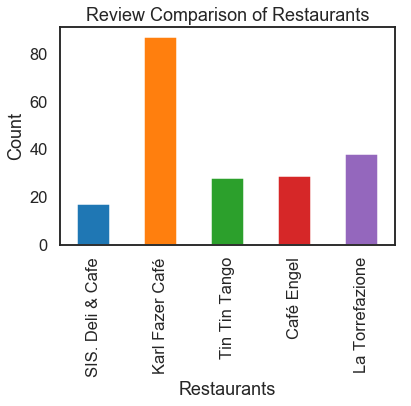

In [101]:
#compare_list = [review_compare, ratings_compare, distance_compare, price_compare]
#for dict in compare_list:
pseries = pd.Series(review_compare)
pseries.sort_values(ascending=False)
pseries.plot(kind = 'bar')
plt.title('Review Comparison of Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Count')
plt.show()

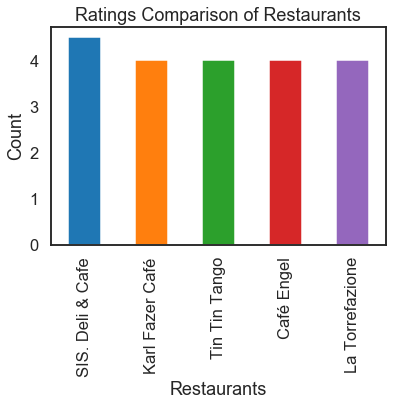

In [102]:
pseries = pd.Series(ratings_compare)
pseries.sort_values(ascending=False)
pseries.plot(kind = 'bar')
plt.title('Ratings Comparison of Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Count')
plt.show()

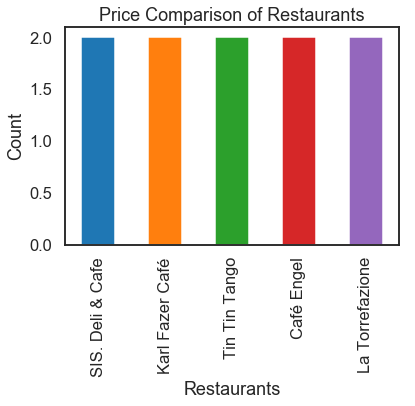

In [107]:
pseries = pd.Series(price_compare)
pseries.sort_values(ascending=False)
pseries.plot(kind = 'bar')
plt.title('Price Comparison of Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Count')
plt.show()

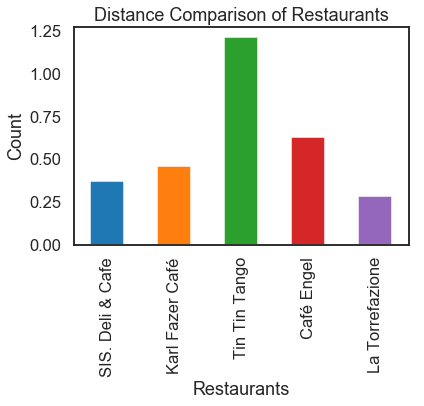

In [103]:
pseries = pd.Series(distance_compare)
pseries.sort_values(ascending=False)
pseries.plot(kind = 'bar')
plt.title('Distance Comparison of Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Count')
plt.show()

In [65]:
#print(new_data)

In [60]:
coords_3 = (60.170942851766, 24.940992593765) #Helsinki central location
coords_4 = (60.1675, 24.9311) #kamppi
print ("distance between kamppi and cordinates is ",geopy.distance.vincenty(coords_3, coords_4).km, " kilometers")

distance between kamppi and cordinates is  0.6698824870470779  kilometers


In [ ]:
coords_1 = (60.170942851766, 24.940992593765) #Helsinki central location
coords_2 = (60.4353, 22.2191) #port of turku

In [54]:
import geopy.distance

In [99]:
print (geopy.distance.vincenty(coords_1, coords_2).km, " kilometers")
print (geopy.distance.distance(coords_1, coords_2).km, " kilometers")
print(type(geopy.distance.distance(coords_1, coords_2).km))
print(type(geopy.distance.vincenty(coords_1, coords_2).km))
#print(float(geopy.distance.distance(coords_1, coords_2)))


153.33352656161657  kilometers
153.33352656166335  kilometers
<class 'float'>
<class 'float'>


In [59]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(60.170942851766)
lon1 = radians(24.940992593765)
lat2 = radians(60.4353)
lon2 = radians(22.2191)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("The distance between turku port and central helsinki is ", distance, "km")

The distance between turku port and central helsinki is  152.831917641948 km


In [63]:
import json
j = json.loads('{"one" : "1", "two" : "2", "three" : "3"}')
print (j['two'])

2


In [ ]:
#hours[x].open[x].day
#0 = monday, 6 = sunday
#https://fi.yelp.fi/helsinki
#<ul class="suggested-filters_price-filters">
#        <input checked="checked" name="price" type="checkbox" value="RestaurantsPriceRange2.1">
#        <span class="filter-label show-tooltip">
#            €
#        <input name="price" type="checkbox" value="RestaurantsPriceRange2.2">
#        <span class="filter-label show-tooltip">
#            €€


In [105]:
ourname = "j€us€€tin"
ourname.count('€')

3